In [21]:
import pandas as pd
df = pd.read_excel(r'tables/data_pts.xlsx')
#print(df)

In [82]:
print(np.mean(df.share))

333.3373570520966


In [83]:
print('hello')

pts = np.zeros(len(df['coin']))
#print(df.pts[9])
#print(len(df['av']), df['pts'])
#Coefficients.
view_c = 0.025
share_c = 3
coin_c = 1
fav_c = 1
for i in range(len(df['coin'])):
    if i%100000==0:
        print(i)
    reviseA = 1
    reviseB = min(1, (share_c*df.share[i]+fav_c*df.favorite[i]+coin_c*df.coin[i])\
                  /(view_c*df.viewcount[i]+share_c*df.share[i]+coin_c*df.coin[i]))
    pts[i] = view_c*df.viewcount[i]*reviseA + (share_c*df.share[i]+coin_c*df.coin[i])*reviseB + fav_c*df.favorite[i]
df['pts'] = pts
#print(df['pts'])

hello
0
100000


In [84]:
writer = pd.ExcelWriter('data_pts.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
df.to_excel(writer, encoding='utf-8',sheet_name='Sheet1')

In [ ]:
STR1 = df.keywords[5][-28:]
STR2 = df.keywords[2][-34:]
STR3 = df.keywords[7][-28:]
STR4 = df.keywords[854][-28:]
newkeyword = np.empty(len(df['coin']))

for i in range(len(df['coin'])):
    key = df.keywords[i][-28:]
    if key!=STR1 and df.keywords[i][-34:]!=STR2 and key!=STR3 and key!=STR4:
        print(i, df.av[i], df.keywords[i], df.keywords[i][0:28])
        if df.duration[i]==0:
            print('haoba.')
    #else:
       # if df.keywords[i][-34:]==STR2:
           # newkeyword[i] = [:-34]
        #break


In [20]:
import collections
import itertools
import nltk
#print(df.keywords[:2])
#print(df.keywords[1].split(','))
#print(collections.Counter(itertools.chain.from_iterable(v.split(',') for v in df.keywords[:50000])))

In [70]:
time = df.uploadtime
from datetime import datetime
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2009, 7, 13)
end_date = date(2019, 5, 1)
view = []
acc = []
i = 0
total = 0
iteratior = df.viewcount
for single_date in daterange(start_date, end_date):
    today = 0
    #print(df.uploadtime[i].timestamp())
    for s in range(i, len(iteratior)):
        #print(single_date, df.uploadtime[len(df.viewcount) - i - 1].to_pydatetime().date())
        if single_date == df.uploadtime[len(iteratior) - i - 1].to_pydatetime().date():
            today += iteratior[len(iteratior) - i - 1]
            i+=1
        else:
            break
    total += today
    view += [today]
    acc += [total]
    
print(acc, view)

#timestamp = datetime.timestamp(now)
#print("timestamp =", timestamp)

[56130, 2690453, 2690453, 2690453, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2702125, 2729895, 2737694, 2737694, 2737694, 2737694, 2737694, 2737694, 2737694, 2737694, 2737694, 2737694, 2737694, 2737694, 2737694, 2737694, 2816369, 2816369, 2821270, 2821270, 2821270, 2891803, 2891803, 2891803, 2891803, 2891803, 3025536, 3025536, 3025536, 3025536, 3025536, 3224805, 3224805, 3238765, 3238765, 3238765, 3238765, 3240683, 3312533, 3312533, 3327996, 3331975, 3334956, 3334956, 3347361, 3347361, 3362554, 3362554, 3362554, 3362554, 3362554, 3362554, 3362554, 3362554, 3362554, 3366621, 3366621, 3366621, 3366621, 3366621, 3366621, 3371230, 3371230, 3371230, 3371230, 3371230, 3371230, 3371230, 3371230, 3371230, 3983349, 3983349, 3991826, 3991826, 3991826, 3991826, 3991826, 3991826, 3991826, 3991826, 3991826, 3991826, 3991826, 3991826, 3991826, 39

C:\Users\zhang\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


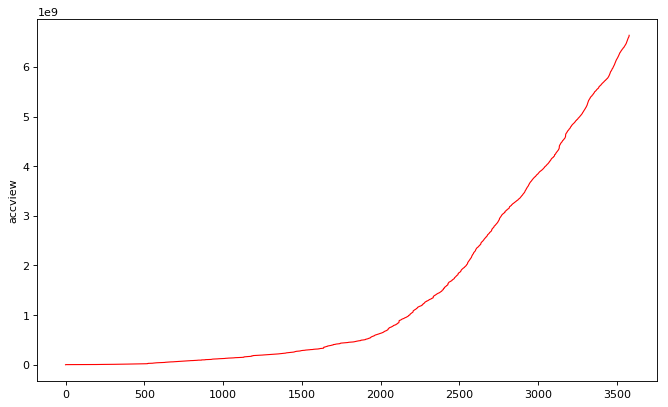

In [74]:
import matplotlib.pyplot as plt
import numpy as np
#nterpolate import make_interp_spline, BSpline
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')


from scipy.signal import lfilter

n = 1  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,acc)
plt.plot(yy, linewidth=1, c="r")  # smooth by filter

plt.ylabel('accview')
plt.savefig('view.jpg')
plt.show()

In [63]:

with open("txt.txt","w",encoding='utf-8') as f:
    for i in range(len(iteratior)):
    #print(df.description[i])
        f.write(str(df.description[i]))
            
    